# Analiza și Vizualizarea Datelor Atmosferice folosind Serviciul de Monitorizare a Atmosferei Copernicus (CAMS)

## Curățarea și preprocesarea datelor

### Încărcarea datelor

Conform ghidului de pe Copernicus.

In [1]:
# Libraries for working with multi-dimensional arrays
import numpy as np
import xarray as xr
import pandas as pd

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import ListedColormap

from datetime import datetime

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import seaborn as sns

import ipywidgets

Setul de date `AMS European air quality reanalyses` a fost descărcat în mod manual de pe:

https://ads.atmosphere.copernicus.eu/datasets/cams-europe-air-quality-reanalyses?tab=overview

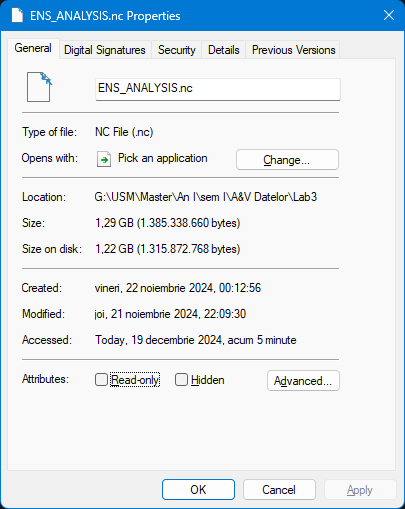

In [2]:
dataset = xr.open_dataset('ENS_ANALYSIS.nc')
dataset

<xarray.Dataset> Size: 1GB
Dimensions:              (longitude: 700, latitude: 420, level: 1, time: 62)
Coordinates:
  * longitude            (longitude) float32 3kB 335.0 335.1 ... 44.85 44.95
  * latitude             (latitude) float32 2kB 71.95 71.85 ... 30.15 30.05
  * level                (level) float32 4B 0.0
  * time                 (time) timedelta64[ns] 496B 0 days 1 days ... 61 days
Data variables: (12/19)
    chocho_conc          (time, level, latitude, longitude) float32 73MB ...
    co_conc              (time, level, latitude, longitude) float32 73MB ...
    dust                 (time, level, latitude, longitude) float32 73MB ...
    pm10_ss_conc         (time, level, latitude, longitude) float32 73MB ...
    ecres_conc           (time, level, latitude, longitude) float32 73MB ...
    ectot_conc           (time, level, latitude, longitude) float32 73MB ...
    ...                   ...
    pm10_conc            (time, level, latitude, longitude) float32 73MB ...
    pm2p5_total_om_conc  (time, level, latitude, longitude) float32 73MB ...
    pm2p5_conc           (time, level, latitude, longitude) float32 73MB ...
    pmwf_conc            (time, level, latitude, longitude) float32 73MB ...
    sia_conc             (time, level, latitude, longitude) float32 73MB ...
    so2_conc             (time, level, latitude, longitude) float32 73MB ...
Attributes:
    title:        CHOCHO/CO/Dust/PM10_SEASALT_DRY/ECRES/ECTOT/HCHO/NH3/NMVOC/...
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20240901-20241101+[0H_0H]
    summary:      ENSEMBLE model hourly ANALYSIS of CHOCHO/CO/Dust/PM10_SEASA...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

### Gestionați datele lipsă sau inconsistente

Nu există datele lipsă.

In [3]:
dataset.isnull().sum()

<xarray.Dataset> Size: 152B
Dimensions:              ()
Data variables: (12/19)
    chocho_conc          int64 8B 0
    co_conc              int64 8B 0
    dust                 int64 8B 0
    pm10_ss_conc         int64 8B 0
    ecres_conc           int64 8B 0
    ectot_conc           int64 8B 0
    ...                   ...
    pm10_conc            int64 8B 0
    pm2p5_total_om_conc  int64 8B 0
    pm2p5_conc           int64 8B 0
    pmwf_conc            int64 8B 0
    sia_conc             int64 8B 0
    so2_conc             int64 8B 0

### Convertiți datele temporale într-un format unificat

Vor fi convertite din `timedelta64[ns]` în `datetime64[ns]`.

In [4]:
timestamp = dataset['time'].long_name[19:27]

timestamp_init=datetime.strptime(timestamp, '%Y%m%d')

time_coords = pd.date_range(timestamp_init, periods=len(dataset['time']), freq='1h').strftime("%Y-%m-%d %H:%M:%S").astype('datetime64[ns]')
time_coords

dataset = dataset.assign_coords(time=time_coords)
dataset['time']

<xarray.DataArray 'time' (time: 62)> Size: 496B
array(['2024-09-01T00:00:00.000000000', '2024-09-01T01:00:00.000000000',
       '2024-09-01T02:00:00.000000000', '2024-09-01T03:00:00.000000000',
       '2024-09-01T04:00:00.000000000', '2024-09-01T05:00:00.000000000',
       '2024-09-01T06:00:00.000000000', '2024-09-01T07:00:00.000000000',
       '2024-09-01T08:00:00.000000000', '2024-09-01T09:00:00.000000000',
       '2024-09-01T10:00:00.000000000', '2024-09-01T11:00:00.000000000',
       '2024-09-01T12:00:00.000000000', '2024-09-01T13:00:00.000000000',
       '2024-09-01T14:00:00.000000000', '2024-09-01T15:00:00.000000000',
       '2024-09-01T16:00:00.000000000', '2024-09-01T17:00:00.000000000',
       '2024-09-01T18:00:00.000000000', '2024-09-01T19:00:00.000000000',
       '2024-09-01T20:00:00.000000000', '2024-09-01T21:00:00.000000000',
       '2024-09-01T22:00:00.000000000', '2024-09-01T23:00:00.000000000',
       '2024-09-02T00:00:00.000000000', '2024-09-02T01:00:00.000000000',
       '2024-09-02T02:00:00.000000000', '2024-09-02T03:00:00.000000000',
       '2024-09-02T04:00:00.000000000', '2024-09-02T05:00:00.000000000',
       '2024-09-02T06:00:00.000000000', '2024-09-02T07:00:00.000000000',
       '2024-09-02T08:00:00.000000000', '2024-09-02T09:00:00.000000000',
       '2024-09-02T10:00:00.000000000', '2024-09-02T11:00:00.000000000',
       '2024-09-02T12:00:00.000000000', '2024-09-02T13:00:00.000000000',
       '2024-09-02T14:00:00.000000000', '2024-09-02T15:00:00.000000000',
       '2024-09-02T16:00:00.000000000', '2024-09-02T17:00:00.000000000',
       '2024-09-02T18:00:00.000000000', '2024-09-02T19:00:00.000000000',
       '2024-09-02T20:00:00.000000000', '2024-09-02T21:00:00.000000000',
       '2024-09-02T22:00:00.000000000', '2024-09-02T23:00:00.000000000',
       '2024-09-03T00:00:00.000000000', '2024-09-03T01:00:00.000000000',
       '2024-09-03T02:00:00.000000000', '2024-09-03T03:00:00.000000000',
       '2024-09-03T04:00:00.000000000', '2024-09-03T05:00:00.000000000',
       '2024-09-03T06:00:00.000000000', '2024-09-03T07:00:00.000000000',
       '2024-09-03T08:00:00.000000000', '2024-09-03T09:00:00.000000000',
       '2024-09-03T10:00:00.000000000', '2024-09-03T11:00:00.000000000',
       '2024-09-03T12:00:00.000000000', '2024-09-03T13:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 496B 2024-09-01 ... 2024-09-03T13:00:00

### Extrageți caracteristicile relevante pentru analiză

Coordonata `level` este compusă dintr-o singură valoare, și trebuie ștearsă.

Toate variabilele de date reprezintă poluanți.

In [5]:
dataset = dataset.sel(level='0')
dataset

<xarray.Dataset> Size: 1GB
Dimensions:              (longitude: 700, latitude: 420, time: 62)
Coordinates:
  * longitude            (longitude) float32 3kB 335.0 335.1 ... 44.85 44.95
  * latitude             (latitude) float32 2kB 71.95 71.85 ... 30.15 30.05
    level                float32 4B 0.0
  * time                 (time) datetime64[ns] 496B 2024-09-01 ... 2024-09-03...
Data variables: (12/19)
    chocho_conc          (time, latitude, longitude) float32 73MB 3.714e-06 ....
    co_conc              (time, latitude, longitude) float32 73MB 170.2 ... 1...
    dust                 (time, latitude, longitude) float32 73MB 0.00459 ......
    pm10_ss_conc         (time, latitude, longitude) float32 73MB 0.00459 ......
    ecres_conc           (time, latitude, longitude) float32 73MB 1.185e-25 ....
    ectot_conc           (time, latitude, longitude) float32 73MB 5.735e-05 ....
    ...                   ...
    pm10_conc            (time, latitude, longitude) float32 73MB 0.5 ... 390.1
    pm2p5_total_om_conc  (time, latitude, longitude) float32 73MB 0.1225 ... ...
    pm2p5_conc           (time, latitude, longitude) float32 73MB 0.5 ... 99.07
    pmwf_conc            (time, latitude, longitude) float32 73MB 7.663e-20 ....
    sia_conc             (time, latitude, longitude) float32 73MB 0.129 ... 11.4
    so2_conc             (time, latitude, longitude) float32 73MB 0.0447 ... ...
Attributes:
    title:        CHOCHO/CO/Dust/PM10_SEASALT_DRY/ECRES/ECTOT/HCHO/NH3/NMVOC/...
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20240901-20241101+[0H_0H]
    summary:      ENSEMBLE model hourly ANALYSIS of CHOCHO/CO/Dust/PM10_SEASA...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

## Analiza datelor

### Calculați statistici descriptive de bază pentru nivelurile poluanților

In [6]:
dataset.std().data_vars

Data variables:
    chocho_conc          float32 4B 0.01209
    co_conc              float32 4B 35.87
    dust                 float32 4B 10.63
    pm10_ss_conc         float32 4B 6.323
    ecres_conc           float32 4B 0.07515
    ectot_conc           float32 4B 0.1493
    hcho_conc            float32 4B 0.4519
    nh3_conc             float32 4B 1.171
    nmvoc_conc           float32 4B 7.256
    no2_conc             float32 4B 2.962
    no_conc              float32 4B 0.2195
    o3_conc              float32 4B 18.38
    pans_conc            float32 4B 0.606
    pm10_conc            float32 4B 13.07
    pm2p5_total_om_conc  float32 4B 1.24
    pm2p5_conc           float32 4B 5.484
    pmwf_conc            float32 4B 0.526
    sia_conc             float32 4B 2.112
    so2_conc             float32 4B 1.561

### Identificați tendințele în timp pentru un poluant selectat, utilizând analiza seriilor temporale

In [7]:
weights = np.cos(np.deg2rad(dataset['latitude']))
weights.name = 'weights'
ds_weighted = dataset.weighted(weights)
co_ds = ds_weighted.mean(dim=['latitude', 'longitude'])
co_ds

<xarray.Dataset> Size: 5kB
Dimensions:              (time: 62)
Coordinates:
    level                float32 4B 0.0
  * time                 (time) datetime64[ns] 496B 2024-09-01 ... 2024-09-03...
Data variables: (12/19)
    chocho_conc          (time) float32 248B 0.0095 0.01151 ... 0.01041 0.01043
    co_conc              (time) float32 248B 176.1 174.4 175.2 ... 154.2 152.3
    dust                 (time) float32 248B 3.875 3.647 4.202 ... 4.578 4.73
    pm10_ss_conc         (time) float32 248B 5.277 5.517 5.45 ... 3.61 2.887
    ecres_conc           (time) float32 248B 0.009075 0.01409 ... 0.05074
    ectot_conc           (time) float32 248B 0.07507 0.08797 ... 0.1327 0.126
    ...                   ...
    pm10_conc            (time) float32 248B 17.8 17.46 18.15 ... 16.36 16.25
    pm2p5_total_om_conc  (time) float32 248B 1.325 1.42 1.294 ... 1.118 1.09
    pm2p5_conc           (time) float32 248B 8.764 8.668 8.874 ... 7.724 7.795
    pmwf_conc            (time) float32 248B 0.1592 0.1549 ... 0.05793 0.07053
    sia_conc             (time) float32 248B 2.993 2.84 2.865 ... 2.282 2.235
    so2_conc             (time) float32 248B 0.8844 0.9728 1.011 ... 1.118 1.15

Aveam peak-uri majore a poluanților între circa:

- `choco_conc` (`Glyoxal`) - 1 septembrie 12:00 și 2 septembrie 06:00; 
- `pmwf_conc` (`PM10 Aerosol from Wildfires`) - 1 septembrie 12:00 și 2 septembrie 06:00;
- `pans_conc` (`Acyl Peroxy Nitrates`) - 1 septembrie 12:00 și 2 septembrie 02:00.

Sunt în creștere următorii poluanți:

- `ecres_conc` (`Residential Elementary Carbon`);
- `ectot_conc` (`Total Elementary Carbon`);
- `no2_conc` (`Nitrogen Dioxide`);
- `so2_conc` (`Sulphur Dioxide`).

Sunt în descreștere următorii poluanți:

- `hcho_conc` (`Formaldehyde`);
- `o3_conc` (`Ozone`).

Poluantul `no_conc` (`Nitrogen Monoxide`) a început să crească brusc undeva la 2 septembrie 18:00.

In [8]:
@ipywidgets.interact(poluant=[*co_ds.data_vars])
def plot_poluant(poluant):
    co_ds[poluant].plot()
    plt.title(dataset.data_vars[poluant].species)

interactive(children=(Dropdown(description='poluant', options=('chocho_conc', 'co_conc', 'dust', 'pm10_ss_conc…

### Utilizați o hartă termică pentru a vizualiza concentrațiile poluanților pe o hartă geografică

In [9]:
no2_limits = [0, 40, 90, 120, 230, 340, 1000]
ozone_limits = [0, 50, 100, 130, 240, 380, 800]
pm10_limits = [0, 10, 20, 25, 50, 75, 800]
pm25_limits = [0, 20, 40, 50, 100, 150, 1200]
so2_limits = [0, 100, 200, 350, 500, 750, 1250]

bin_list = [no2_limits, ozone_limits, pm10_limits, pm25_limits, so2_limits]
bin_list

[[0, 40, 90, 120, 230, 340, 1000],
 [0, 50, 100, 130, 240, 380, 800],
 [0, 10, 20, 25, 50, 75, 800],
 [0, 20, 40, 50, 100, 150, 1200],
 [0, 100, 200, 350, 500, 750, 1250]]

In [10]:
variable_list = ['no2_conc', 'o3_conc', 'pm10_conc', 'pm2p5_conc', 'so2_conc']
variable_list

['no2_conc', 'o3_conc', 'pm10_conc', 'pm2p5_conc', 'so2_conc']

In [11]:
classified_arrays = []
for i in range(0,len(variable_list)):
    variable = variable_list[i]
    temp = xr.apply_ufunc(np.digitize, dataset[variable], bin_list[i])
    classified_arrays.append(temp)

In [12]:
combined = xr.merge(classified_arrays).sel(time='2024-09-01T00:00:00.000000000')
combined

<xarray.Dataset> Size: 12MB
Dimensions:     (longitude: 700, latitude: 420)
Coordinates:
  * longitude   (longitude) float32 3kB 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude    (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
    level       float32 4B 0.0
    time        datetime64[ns] 8B 2024-09-01
Data variables:
    no2_conc    (latitude, longitude) int64 2MB 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    o3_conc     (latitude, longitude) int64 2MB 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2
    pm10_conc   (latitude, longitude) int64 2MB 1 1 1 1 1 1 1 ... 4 3 3 3 3 3 4
    pm2p5_conc  (latitude, longitude) int64 2MB 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    so2_conc    (latitude, longitude) int64 2MB 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1

In [13]:
final_index = combined.to_array().max('variable')
final_index

<xarray.DataArray (latitude: 420, longitude: 700)> Size: 2MB
array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 4],
       [2, 2, 2, ..., 2, 2, 4],
       [2, 2, 2, ..., 3, 3, 4]])
Coordinates:
  * longitude  (longitude) float32 3kB 335.0 335.1 335.2 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 2kB 71.95 71.85 71.75 ... 30.25 30.15 30.05
    level      float32 4B 0.0
    time       datetime64[ns] 8B 2024-09-01

C:\Users\Cristian\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


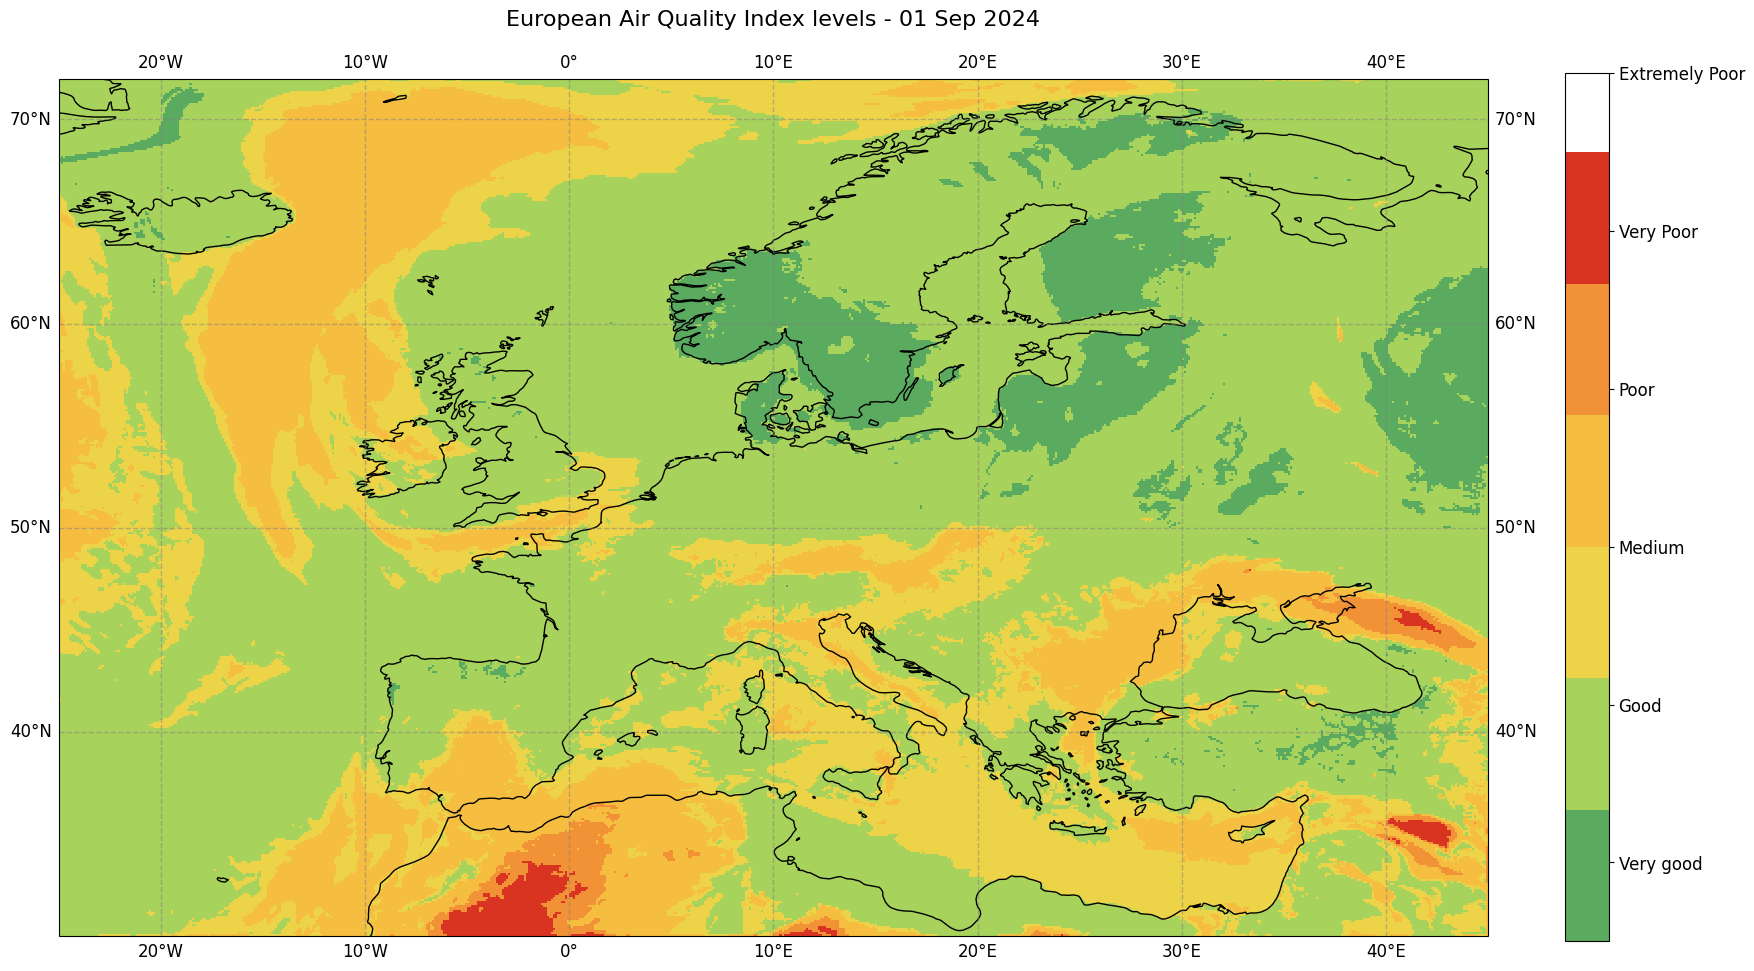

In [14]:
cmap = ListedColormap(['#5AAA5F', '#A7D25C', '#ECD347', '#F5BE41', '#F09235', '#D93322'])
labels = ['Very good', 'Good', 'Medium', 'Poor', 'Very Poor', 'Extremely Poor']

# Initiate a matplotlib figure
fig = plt.figure(figsize=(20,15))
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

# Plotting function
img = plt.pcolormesh(final_index['longitude'], 
                     final_index['latitude'], 
                     final_index, 
                     cmap = cmap,
                     label = labels)

# Set the title of the plot
ax.set_title('European Air Quality Index levels - 01 Sep 2024', fontsize=16, pad=20.0)

# Customize colorbar
cbar = plt.colorbar(img, fraction=0.028, pad=0.05)
cbar.set_label(None)
cbar.ax.tick_params(labelsize=12)
cbar.set_ticks([1.5,2.5,3.5,4.5,5.5,6.5])
cbar.set_ticklabels(labels)

# Add additional features such as coastlines and a geographic grid
ax.coastlines(color='black')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}